In [1]:
from model.GNN import HailNet, train, test
from src.data_processing import get_traindl, get_testdl
from torch.optim import Adam, SGD
import torch

In [2]:
num_epochs = 10
n = 1
long = 234
lat = 346

model = HailNet(n, long, lat)
train_dl = get_traindl((2001, 2005), "mean_2m_air_temperature", "data/Tambov")
loss_fn = torch.nn.BCELoss()
opt_sgd = SGD(model.parameters(), lr=0.01, momentum=0.1)
opt_adam = Adam(model.parameters(), lr=0.1)

#losses_sgd = train(num_epochs, model, loss_fn, opt_sgd, train_dl)
losses_adam = train(num_epochs, model, loss_fn, opt_sgd, train_dl)

Epoch: 0 | Loss: 0.07255633175373077
Epoch: 1 | Loss: 0.04668614640831947
Epoch: 2 | Loss: 0.03975324332714081
Epoch: 3 | Loss: 0.03706739842891693
Epoch: 4 | Loss: 0.035885296761989594
Epoch: 5 | Loss: 0.0353359580039978
Epoch: 6 | Loss: 0.035074301064014435
Epoch: 7 | Loss: 0.03494812920689583
Epoch: 8 | Loss: 0.03488702327013016
Epoch: 9 | Loss: 0.03485727310180664


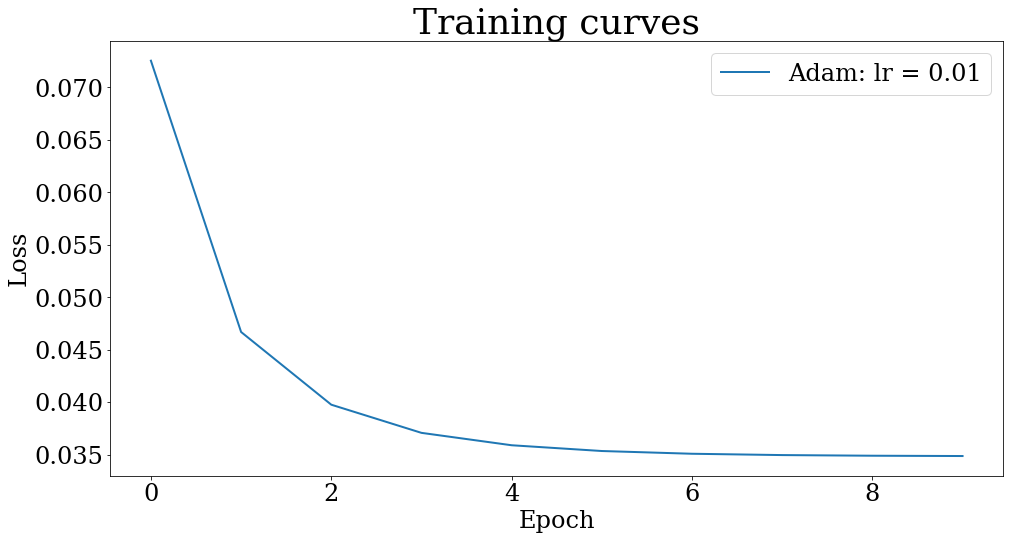

In [3]:
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
### Сохранение изображения ###
plt.figure(figsize = (16,  8))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training curves")
plt.plot(losses_adam, label = "Adam: lr = 0.01")
#plt.plot(losses_sgd, label = "SGD: lr = 0.01, momentum = 0.1")
plt.legend()
plt.show()

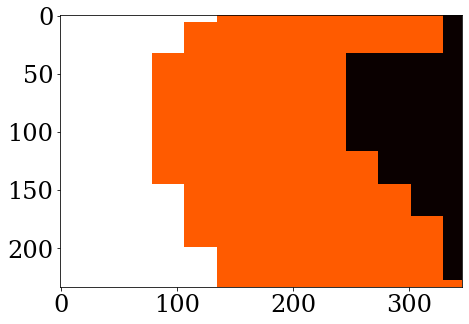

target: 0.0, prediction: 0.033738069236278534


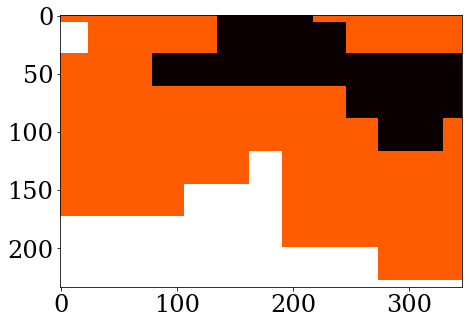

target: 0.0, prediction: 0.033738069236278534


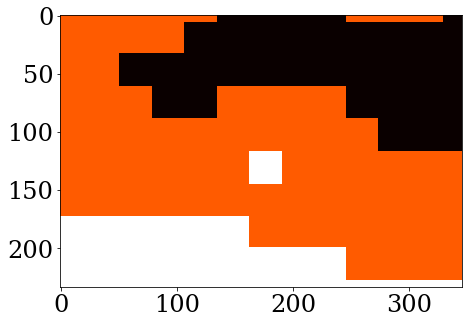

target: 0.0, prediction: 0.033738069236278534


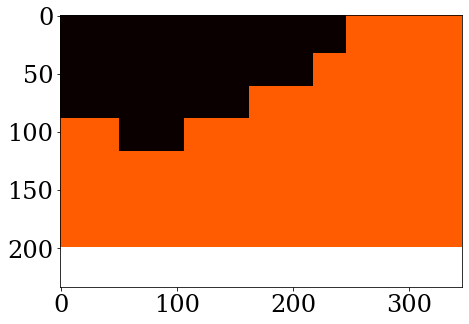

target: 0.0, prediction: 0.033738069236278534


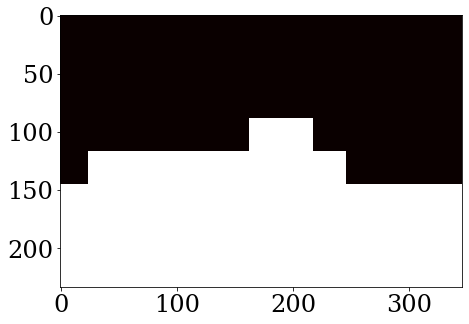

target: 0.0, prediction: 0.033738069236278534


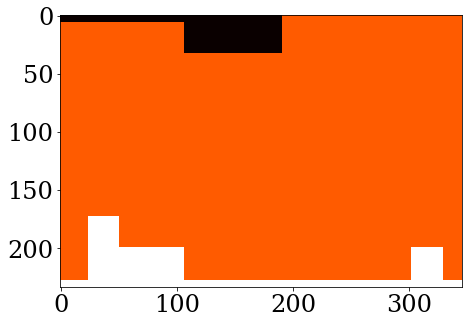

target: 0.0, prediction: 0.033738069236278534


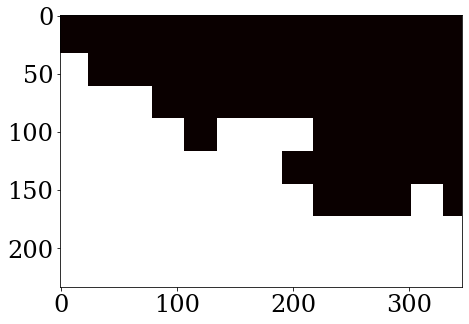

target: 0.0, prediction: 0.033738069236278534


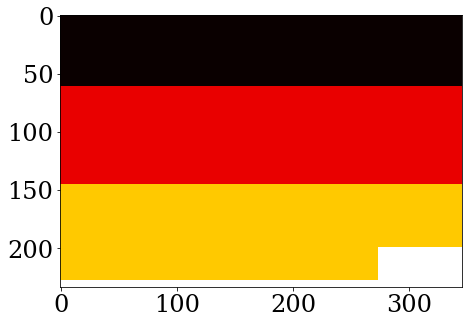

target: 0.0, prediction: 0.033738069236278534


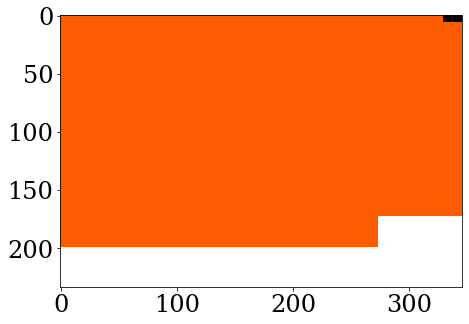

target: 0.0, prediction: 0.033738069236278534


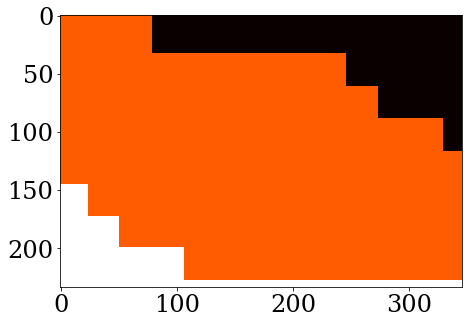

target: 0.0, prediction: 0.033738069236278534


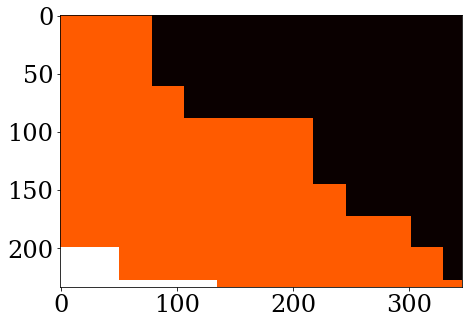

target: 0.0, prediction: 0.033738069236278534


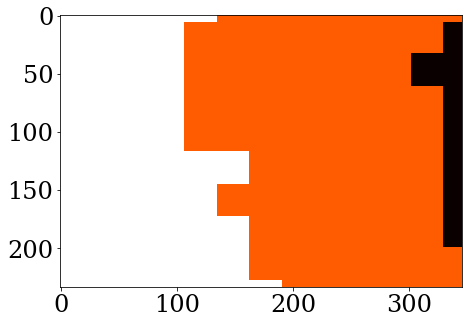

target: 0.0, prediction: 0.033738069236278534


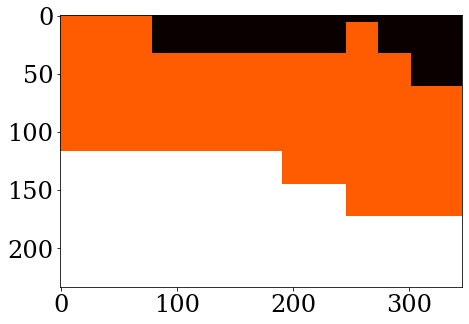

target: 0.0, prediction: 0.033738069236278534


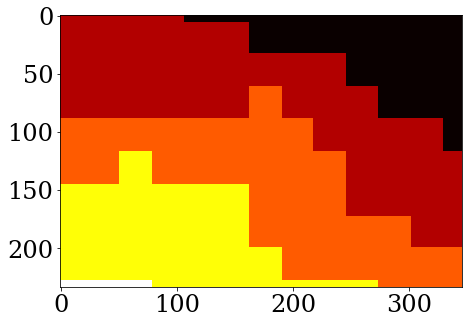

target: 0.0, prediction: 0.033738069236278534


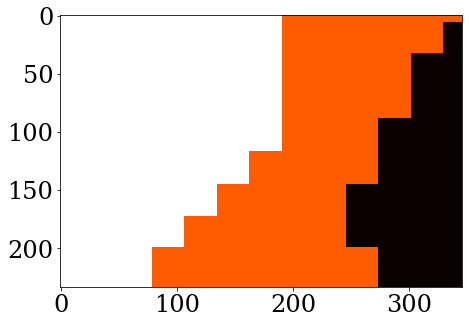

target: 0.0, prediction: 0.033738069236278534


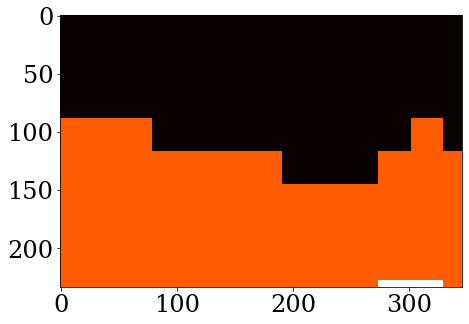

target: 0.0, prediction: 0.033738069236278534


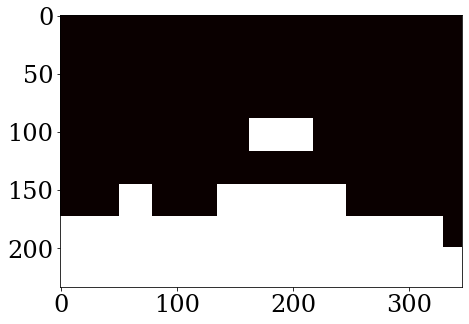

target: 0.0, prediction: 0.033738069236278534


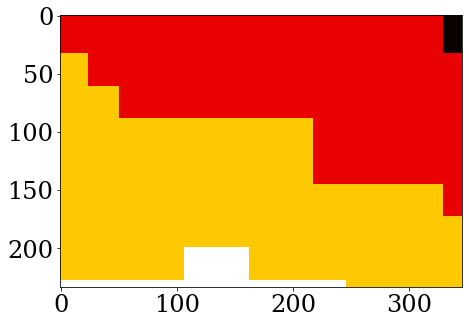

target: 1.0, prediction: 0.033738069236278534


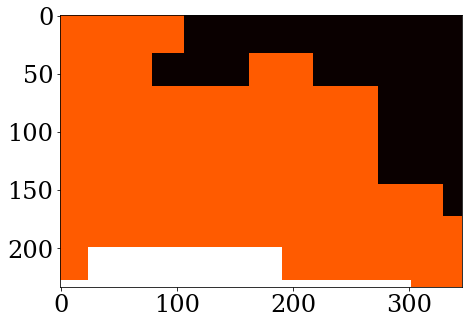

target: 0.0, prediction: 0.033738069236278534


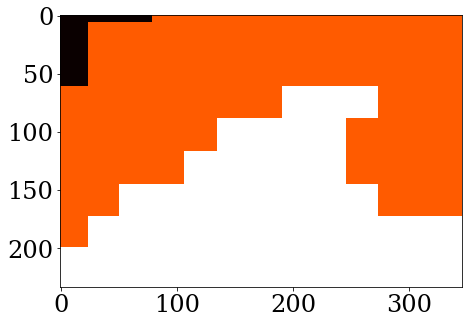

target: 0.0, prediction: 0.033738069236278534


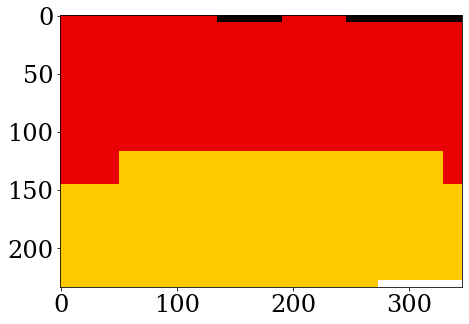

target: 0.0, prediction: 0.033738069236278534


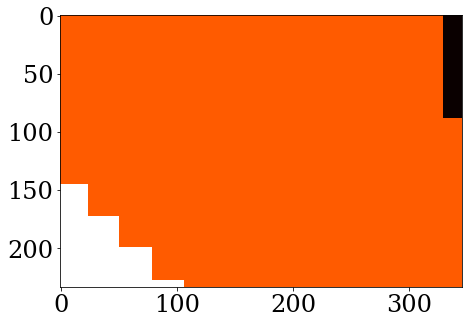

target: 0.0, prediction: 0.033738069236278534


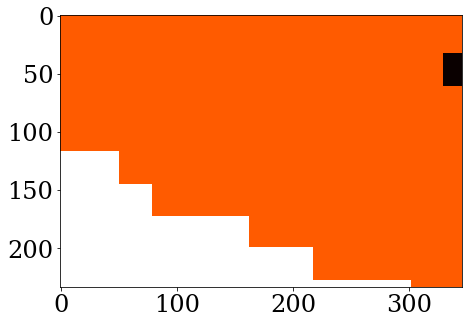

target: 0.0, prediction: 0.033738069236278534


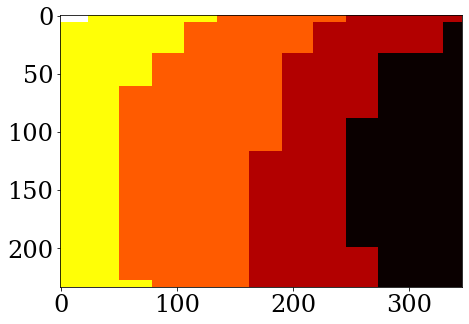

target: 0.0, prediction: 0.033738069236278534


In [4]:
from sklearn.metrics import accuracy_score, classification_report
test_dl = get_testdl((2006, 2007), "mean_2m_air_temperature", "data/Tambov")
preds, trues = test(model, test_dl, ["accuracy"], {"accuracy": accuracy_score})

In [ ]:
import numpy as np
np.array(list(map(np.array, preds)))

In [14]:
a = torch.tensor([[1,2,3]])
a.numpy().reshape(1, -1)

array([[1, 2, 3]], dtype=int64)

In [15]:
torch.tensor([[1,2,3]]).reshape(0,-1, -1)

RuntimeError: only one dimension can be inferred

In [5]:
model

HailNet(
  (embedding_layer): GNNLayer(
    (lin1): Linear(in_features=80964, out_features=256, bias=True)
  )
  (lin1): Linear(in_features=256, out_features=1, bias=True)
)

In [13]:
x = torch.ones((1, long, lat))*100000
model(x)

tensor([[0.0337]], grad_fn=<SigmoidBackward0>)